# Prepare

In [1]:
%%writefile noise.py
#!usr/bin/bash python
#-*-coding:utf-8

"""
Peter's Code
Clone Code w/ 6개월 치 업무를 하루만에 끝내는 업무 자동화
Last Modification : 2021.12.12
"""

import time
import os
import numpy as np
from PIL import Image

print("Process Start.")
start_time = time.time()

NUM_SAMPLES = 1000

out_dir = "random_image"
if out_dir not in os.listdir():
    os.mkdir(out_dir)

for i in range(NUM_SAMPLES):
    name = str(time.time())[-7:] + ".png"
    
    Xdim, Ydim = np.random.randint(100, 400, size=2)

    # revised
    image = np.random.randint(256, size=(Xdim, Ydim, 3)).astype('uint8')

    result = Image.fromarray(image)
    result.save(out_dir + "/" + name)

    result.close()

print("Process Done.")
end_time = time.time()
print("Peter's code " + str(end_time - start_time) + " seconds.")

Writing noise.py


In [2]:
%run noise.py

Process Start.
Process Done.
Peter's code 15.085174083709717 seconds.


# RPA design code
- 목표 정하기
  1. 이미지 파일 불러오기
  1. 원본 이미지의 크기 알아내기
  1. 이미지의 크기 변경하기
  1. 그 과정에서 ```PIL``` 모듈을 활용하기

#### 1. ```PIL```을 활용해 이미지 불러오기
- 앞서 txt 파일이나 CSV 파일을 ```open(filename, 'w')``` 로 불러오듯, 이미지에서는 ```Image.open()``` 함수를 사용한다.
```python
from PIL import Image
my_image = Image.open('img_filename')
```

#### 2. ```PIL```을 활용해 이미지 크기 알아내기
- ```img.size```: ```Image``` 객체의 인스턴스를 이용한다.
- 특히 결과를 언패킹하여 사용하면 용이하다.
```python
X_size, Y_size = img.size
```

#### 3. ```PIL```을 활용해 이미지 크기 변경하기
- ```resize()``` 함수를 이용한다. 단, x, y는 반드시 자연수여야 한다. (소수점이거나 음수 불가능)
```python
img = img.resize((x, y))
```

In [3]:
%%writefile resize.py
#!usr/bin/bash python
#-*-coding:utf-8

"""
Peter's Code
Clone Code w/ 6개월 치 업무를 하루만에 끝내는 업무 자동화
Last Modification : 2021.12.13
"""

import time
import os
from PIL import Image
import sys

print("Process Start.")
start_time = time.time()

directory = sys.argv[1]
percent = float(sys.argv[2])/100

out_dir = "resized_image"
if out_dir not in os.listdir():
    os.mkdir(out_dir)

input_files = os.listdir(directory)

for filename in input_files:
    # exception
    exp = filename.strip().split('.')[-1]
    if exp not in "JPG jpg JPEG jpeg PNG png BMP bmp":
        continue

    image = Image.open(directory + "/" + filename)

    Xdim, Ydim = image.size
    Xdim *= percent
    Ydim *= percent

    image = image.resize((int(Xdim), int(Ydim)))

    image.save(out_dir + "/" + filename)
    image.close()

print("Process Done.")
end_time = time.time()
print("Peter's code " + str(end_time - start_time) + " seconds.")

Writing resize.py


In [4]:
%run resize.py random_image 30

Process Start.
Process Done.
Peter's code 3.5820329189300537 seconds.


##### 이미지 파일 걸러내기

In [16]:
filename = "image.png"
splt = filename.split(".")
splt[-1]

'png'

## Summary
- 이미지 사이즈를 변경하는 과정에서 소숫점이 들어가면 에러가 나기 때문에 정수로 바꾸어준다.
```python
image = image.resize((int(Xdim), int(Ydim)))
```

# Exercise

##### 결과 확인

In [5]:
os.listdir("random_image/")[1]

'0904412.png'

In [6]:
os.listdir("resized_image/")[1]

'0904412.png'

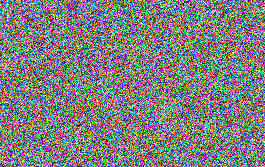

In [10]:
img1 = Image.open("random_image/" + '0904412.png')
display(img1)
img1.close()

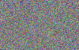

In [11]:
img2 = Image.open("resized_image/" + '0904412.png')
display(img2)
img2.close()

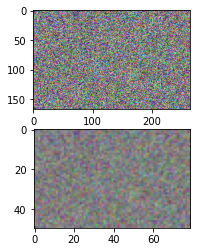

In [15]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

img1 = Image.open("random_image/" + '0904412.png')
img2 = Image.open("resized_image/" + '0904412.png')

fig, axes = plt.subplots(2, 1)
axes[0].imshow(img1)
axes[1].imshow(img2)

img1.close()
img2.close()